In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

import utils

# Read data
df = pd.read_csv('./Data/Gas_Trade_Flows_IEA_202310 - Data.csv')
df.head()

,Borderpoint,Exit,Unnamed: 2,Entry,MAXFLOW (Mm3/h),Oct-08,Nov-08,Dec-08,Jan-09,Feb-09,...,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23
0,Adriatic LNG,Liquefied Natural Gas,-->,Italy,1.10,0,0,0,0,0,...,687.0,654.0,850.0,714.0,809.0,620.0,823.0,693.0,754.0,745.0
1,Almeria,Algeria,-->,Spain,1.07,0,0,0,0,0,...,760.0,659.0,569.0,619.0,698.0,448.0,767.0,696.0,709.0,863.0
2,Alveringem,Belgium,-->,France,NaN,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alveringem,France,-->,Belgium,0.37,0,0,0,0,0,...,644.0,616.0,185.0,240.0,392.0,396.0,195.0,50.0,394.0,371.0
4,Badajoz,Portugal,-->,Spain,0.30,0,0,0,0,12,...,54.0,0.0,4.0,91.0,139.0,84.0,44.0,25.0,19.0,27.0


### Process data

In [2]:
# Drop the unnamed column
df = df.drop(columns=['Unnamed: 2'])
df.head()

,Borderpoint,Exit,Entry,MAXFLOW (Mm3/h),Oct-08,Nov-08,Dec-08,Jan-09,Feb-09,Mar-09,...,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23
0,Adriatic LNG,Liquefied Natural Gas,Italy,1.10,0,0,0,0,0,0,...,687.0,654.0,850.0,714.0,809.0,620.0,823.0,693.0,754.0,745.0
1,Almeria,Algeria,Spain,1.07,0,0,0,0,0,0,...,760.0,659.0,569.0,619.0,698.0,448.0,767.0,696.0,709.0,863.0
2,Alveringem,Belgium,France,NaN,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alveringem,France,Belgium,0.37,0,0,0,0,0,0,...,644.0,616.0,185.0,240.0,392.0,396.0,195.0,50.0,394.0,371.0
4,Badajoz,Portugal,Spain,0.30,0,0,0,0,12,2,...,54.0,0.0,4.0,91.0,139.0,84.0,44.0,25.0,19.0,27.0


In [3]:
# Remove the columns with flow data beteen Oct-08 and Aug-09
df = df.drop(columns=['Oct-08', 'Nov-08', 'Dec-08', 'Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09', 'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09'])

In [4]:
# Create a copy of the dataframe and call it country_aggregated_df
country_aggregated_df = df.copy()
country_aggregated_df.to_csv('./Data/country_aggregated.csv', index=False)
country_aggregated_df.head()

,Borderpoint,Exit,Entry,MAXFLOW (Mm3/h),Jan-10,Feb-10,Mar-10,Apr-10,May-10,Jun-10,...,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23
0,Adriatic LNG,Liquefied Natural Gas,Italy,1.10,602,581,657,622,608,439,...,687.0,654.0,850.0,714.0,809.0,620.0,823.0,693.0,754.0,745.0
1,Almeria,Algeria,Spain,1.07,0,0,0,0,0,0,...,760.0,659.0,569.0,619.0,698.0,448.0,767.0,696.0,709.0,863.0
2,Alveringem,Belgium,France,NaN,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alveringem,France,Belgium,0.37,0,0,0,0,0,0,...,644.0,616.0,185.0,240.0,392.0,396.0,195.0,50.0,394.0,371.0
4,Badajoz,Portugal,Spain,0.30,5,4,2,0,0,0,...,54.0,0.0,4.0,91.0,139.0,84.0,44.0,25.0,19.0,27.0


In [5]:
country_aggregated_df.shape

(228, 170)

### Countries in the data

In [6]:
unique_countries = set(country_aggregated_df['Exit'].unique()) | set(country_aggregated_df['Entry'].unique())

print("Data contains {} unique countries".format(len(unique_countries)))
print(unique_countries)


Data contains 45 unique countries
{'Spain', 'Switzerland', 'Denmark', 'Czech Republic', 'Libya', 'Italy', 'Greece', 'Serbia', 'Poland', 'Netherlands', 'Slovenia', 'Iran', 'Sweden', 'Tunisia', 'Moldova', 'Algeria', 'Belgium', 'Republic of Türkiye', 'Romania', 'United Kingdom', 'Ukraine', 'Norway', 'Austria', 'Lithuania', 'Isle of Man', 'Croatia', 'Not Elsewhere Specified', 'Finland', 'Morocco', 'Bulgaria', 'Liquefied Natural Gas', 'Georgia', 'Ireland', 'Luxembourg', 'North Macedonia', 'Latvia', 'Hungary', 'Slovak Republic', 'Albania', 'Belarus', 'Russia', 'Estonia', 'Germany', 'France', 'Portugal'}


In [7]:
print("Pure exporting countries: {}".format(set(country_aggregated_df['Exit'].unique()) - set(country_aggregated_df['Entry'].unique())))
print("Pure importing countries: {}".format(set(country_aggregated_df['Entry'].unique()) - set(country_aggregated_df['Exit'].unique())))

Pure exporting countries: {'Libya', 'Algeria', 'Belarus', 'Iran', 'Georgia', 'Not Elsewhere Specified'}
Pure importing countries: {'Moldova', 'Ireland', 'Isle of Man', 'Luxembourg', 'Sweden'}


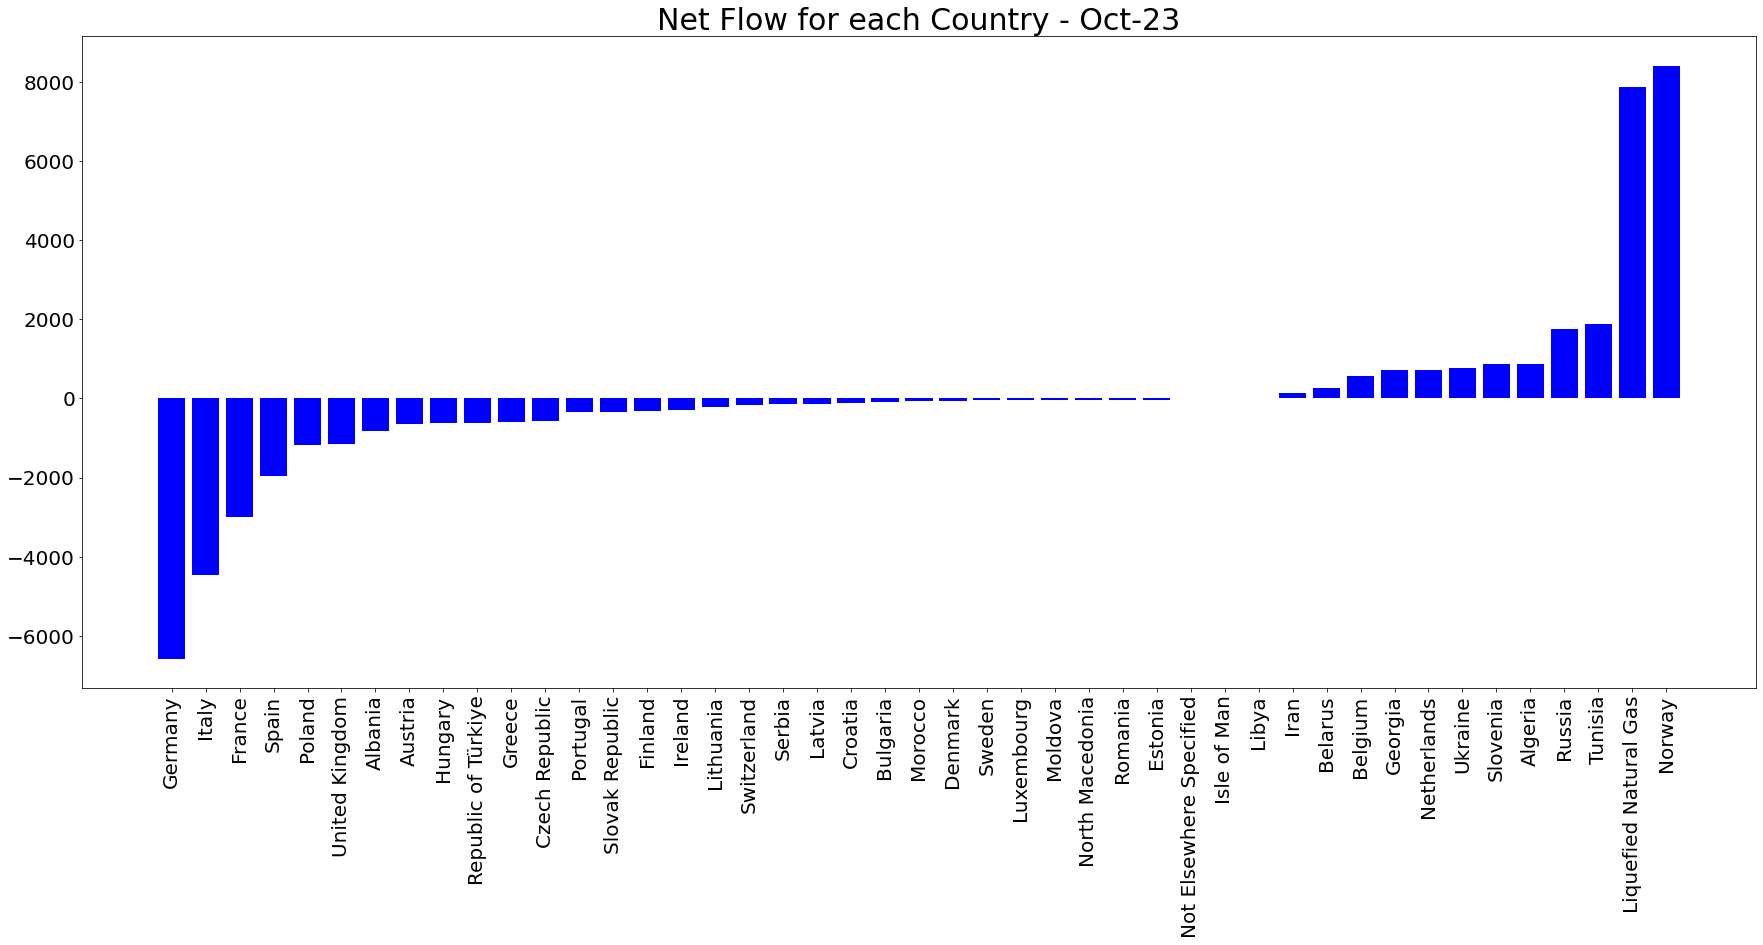

In [8]:
net_flow_df = pd.DataFrame(index=set(country_aggregated_df['Entry'].unique()).union(set(country_aggregated_df['Exit'].unique())))
net_flow_df['Net_Flow_Oct_23'] = net_flow_df.index.map(lambda country: country_aggregated_df.loc[country_aggregated_df['Exit'] == country, 'Oct-23'].sum() - country_aggregated_df.loc[country_aggregated_df['Entry'] == country, 'Oct-23'].sum())
plt.figure(figsize=(30, 12))
net_flow_df.sort_values(by='Net_Flow_Oct_23', inplace=True)
plt.bar(net_flow_df.index, net_flow_df['Net_Flow_Oct_23'], color='blue')
plt.title('Net Flow for each Country - Oct-23', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.show()


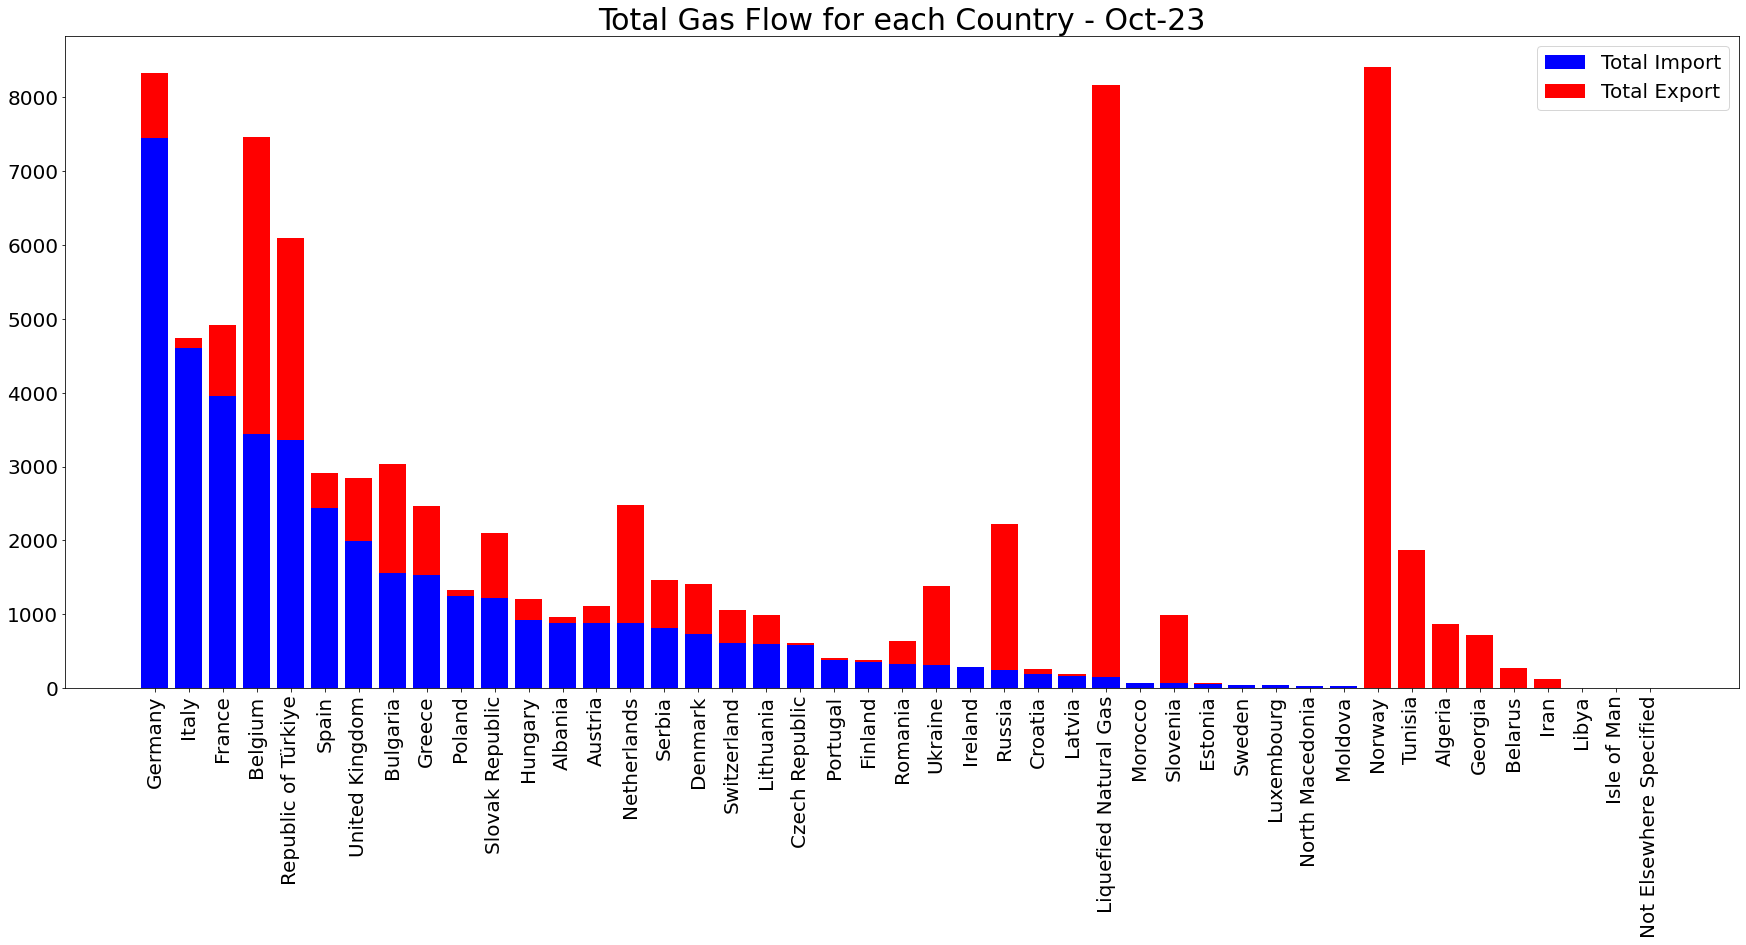

In [9]:
total_flow_df = pd.DataFrame(index=set(country_aggregated_df['Entry'].unique()).union(set(country_aggregated_df['Exit'].unique())))
total_flow_df['Total_Import'] = total_flow_df.index.map(lambda country: country_aggregated_df.loc[country_aggregated_df['Entry'] == country, 'Oct-23'].sum())
total_flow_df['Total_Export'] = total_flow_df.index.map(lambda country: country_aggregated_df.loc[country_aggregated_df['Exit'] == country, 'Oct-23'].sum())
plt.figure(figsize=(30, 12))
total_flow_df.sort_values(by=['Total_Import', 'Total_Export'], ascending=False, inplace=True)
plt.bar(total_flow_df.index, total_flow_df['Total_Import'], color='blue', label='Total Import')
plt.bar(total_flow_df.index, total_flow_df['Total_Export'], color='red', bottom=total_flow_df['Total_Import'], label='Total Export')
plt.title('Total Gas Flow for each Country - Oct-23', fontsize=30)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()


In [10]:
# Retrieve columns with flow data 
mm_yyyy = df.iloc[:, df.columns.get_loc('Jan-10'):]

In [11]:
""" # Heatmap of NaN values
plt.figure(figsize=(30, 8))
sns.heatmap(mm_yyyy.isnull(), cmap='viridis', cbar_kws={'ticks': [0, 1], 'label': 'NaN Values'})
plt.title("Heatmap of NaN values")
 """

' # Heatmap of NaN values\nplt.figure(figsize=(30, 8))\nsns.heatmap(mm_yyyy.isnull(), cmap=\'viridis\', cbar_kws={\'ticks\': [0, 1], \'label\': \'NaN Values\'})\nplt.title("Heatmap of NaN values")\n '

In [12]:
""" # Heatmap of 0 values
plt.figure(figsize=(30, 8))
sns.heatmap(mm_yyyy == 0, cmap='viridis', cbar_kws={'ticks': [0, 1], 'label': '0 Values'})
plt.title("Heatmap of 0 values")
plt.show() """

' # Heatmap of 0 values\nplt.figure(figsize=(30, 8))\nsns.heatmap(mm_yyyy == 0, cmap=\'viridis\', cbar_kws={\'ticks\': [0, 1], \'label\': \'0 Values\'})\nplt.title("Heatmap of 0 values")\nplt.show() '

In [13]:
""" # If a pipeline is observed with non-zero flow at some point in time, we 'keep' the pipeline in the grid for subsequent periods (regardless of whether the flow is zero or not)

mm_yyyy_copy = mm_yyyy.copy()
for index, row in mm_yyyy_copy.iterrows():
    seen_nonzero = False
    for col in mm_yyyy_copy.columns:
        if row[col] == 0:
            if not seen_nonzero:
                mm_yyyy_copy.at[index, col] = -1
        else:
            seen_nonzero = True

# Heatmap of 0 values
plt.figure(figsize=(30, 8))
sns.heatmap(mm_yyyy_copy == -1, cmap='viridis', cbar_kws={'ticks': [0, 1], 'label': '0 Values'})
plt.title("Heatmap of 0 values")
plt.show() """

' # If a pipeline is observed with non-zero flow at some point in time, we \'keep\' the pipeline in the grid for subsequent periods (regardless of whether the flow is zero or not)\n\nmm_yyyy_copy = mm_yyyy.copy()\nfor index, row in mm_yyyy_copy.iterrows():\n    seen_nonzero = False\n    for col in mm_yyyy_copy.columns:\n        if row[col] == 0:\n            if not seen_nonzero:\n                mm_yyyy_copy.at[index, col] = -1\n        else:\n            seen_nonzero = True\n\n# Heatmap of 0 values\nplt.figure(figsize=(30, 8))\nsns.heatmap(mm_yyyy_copy == -1, cmap=\'viridis\', cbar_kws={\'ticks\': [0, 1], \'label\': \'0 Values\'})\nplt.title("Heatmap of 0 values")\nplt.show() '

### Create graph objects of grid per MM-YYYY

In [14]:
graphs = utils.create_graphs_from_dataset(country_aggregated_df)

### Development of borderpoints

In [15]:
"""  
# NOTE:
# If a pipeline is observed with non-zero flow at some point in time, we 'keep' the pipeline 
# in the grid for subsequent periods (regardless of whether the flow is zero or not)


edge_counts_nonzero, edge_counts_zero = [sum(1 for edge in G.edges if G.edges[edge]['flow'] != 0) for G in graphs], [sum(1 for edge in G.edges if G.edges[edge]['flow'] == 0) for G in graphs]

plt.figure(figsize=(40, 20))
bar_width = 0.35

plt.bar(mm_yyyy.columns, edge_counts_nonzero, width=bar_width, label='Nonzero Flow', color='blue')
plt.bar(mm_yyyy.columns, edge_counts_zero, width=bar_width, label='Zero Flow', bottom=edge_counts_nonzero, color='red')
plt.ylabel('Number of Pipelines', fontsize=20)
plt.title('Number of Pipelines in the European Natural Gas Grid, per MM-YYYY', fontsize=30)
plt.legend(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)

plt.show()
 """

"  \n# NOTE:\n# If a pipeline is observed with non-zero flow at some point in time, we 'keep' the pipeline \n# in the grid for subsequent periods (regardless of whether the flow is zero or not)\n\n\nedge_counts_nonzero, edge_counts_zero = [sum(1 for edge in G.edges if G.edges[edge]['flow'] != 0) for G in graphs], [sum(1 for edge in G.edges if G.edges[edge]['flow'] == 0) for G in graphs]\n\nplt.figure(figsize=(40, 20))\nbar_width = 0.35\n\nplt.bar(mm_yyyy.columns, edge_counts_nonzero, width=bar_width, label='Nonzero Flow', color='blue')\nplt.bar(mm_yyyy.columns, edge_counts_zero, width=bar_width, label='Zero Flow', bottom=edge_counts_nonzero, color='red')\nplt.ylabel('Number of Pipelines', fontsize=20)\nplt.title('Number of Pipelines in the European Natural Gas Grid, per MM-YYYY', fontsize=30)\nplt.legend(fontsize=20)\nplt.yticks(fontsize=20)\nplt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)\n\nplt.show()\n "

In [16]:
""" total_flow = mm_yyyy.sum()
plt.figure(figsize=(40, 20))
plt.bar(total_flow.index, total_flow.values)
plt.ylabel('Volume of Flow (million m3)', fontsize=20)
plt.title('Total Volume of Natural Gas Flow in the European natural gas grid, per MM-YYYY', fontsize=30)
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.show()
 """

" total_flow = mm_yyyy.sum()\nplt.figure(figsize=(40, 20))\nplt.bar(total_flow.index, total_flow.values)\nplt.ylabel('Volume of Flow (million m3)', fontsize=20)\nplt.title('Total Volume of Natural Gas Flow in the European natural gas grid, per MM-YYYY', fontsize=30)\nplt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)\nplt.yticks(fontsize=20)\nplt.show()\n "

In [17]:
""" total_export_by_country = country_aggregated_df.groupby('Exit').sum().reset_index().set_index('Exit')
flow_columns = total_export_by_country.columns[total_export_by_country.columns.get_loc('Jan-10'):]
plt.figure(figsize=(40, 20))
total_export_by_country[flow_columns].T.plot(kind='bar', stacked=True, figsize=(40, 20))
plt.title('Total Volume of Flow in the European natural gas grid, broken down by exporter, per MM-YYYY', fontsize=30)
plt.ylabel('Volume of Flow (million m3)', fontsize=20)
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Exporter', loc='upper left', bbox_to_anchor=(1, 1), fontsize=20, title_fontsize=20)
plt.show()
 """

" total_export_by_country = country_aggregated_df.groupby('Exit').sum().reset_index().set_index('Exit')\nflow_columns = total_export_by_country.columns[total_export_by_country.columns.get_loc('Jan-10'):]\nplt.figure(figsize=(40, 20))\ntotal_export_by_country[flow_columns].T.plot(kind='bar', stacked=True, figsize=(40, 20))\nplt.title('Total Volume of Flow in the European natural gas grid, broken down by exporter, per MM-YYYY', fontsize=30)\nplt.ylabel('Volume of Flow (million m3)', fontsize=20)\nplt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)\nplt.yticks(fontsize=20)\nplt.legend(title='Exporter', loc='upper left', bbox_to_anchor=(1, 1), fontsize=20, title_fontsize=20)\nplt.show()\n "

In [18]:
""" total_export_by_country = country_aggregated_df.groupby('Exit').sum().reset_index().set_index('Exit')
flow_columns = total_export_by_country.columns[total_export_by_country.columns.get_loc('Jan-10'):]
top_exporters = total_export_by_country[flow_columns].sum(axis=1).nlargest(15).index
top_exporters_data = total_export_by_country.loc[top_exporters, flow_columns]

plt.figure(figsize=(40, 20))
top_exporters_data.T.plot(kind='bar', stacked=True, figsize=(40, 20))
plt.title('Volume of Flow in the European natural gas grid, broken down by top 15 exporters, per MM-YYYY', fontsize=30)
plt.ylabel('Volume of Flow (million m3)', fontsize=20)
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Exporter', loc='upper left', bbox_to_anchor=(1, 1), fontsize=20, title_fontsize=20)
plt.show()
 """

" total_export_by_country = country_aggregated_df.groupby('Exit').sum().reset_index().set_index('Exit')\nflow_columns = total_export_by_country.columns[total_export_by_country.columns.get_loc('Jan-10'):]\ntop_exporters = total_export_by_country[flow_columns].sum(axis=1).nlargest(15).index\ntop_exporters_data = total_export_by_country.loc[top_exporters, flow_columns]\n\nplt.figure(figsize=(40, 20))\ntop_exporters_data.T.plot(kind='bar', stacked=True, figsize=(40, 20))\nplt.title('Volume of Flow in the European natural gas grid, broken down by top 15 exporters, per MM-YYYY', fontsize=30)\nplt.ylabel('Volume of Flow (million m3)', fontsize=20)\nplt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)\nplt.yticks(fontsize=20)\nplt.legend(title='Exporter', loc='upper left', bbox_to_anchor=(1, 1), fontsize=20, title_fontsize=20)\nplt.show()\n "

In [19]:
""" total_import_by_country = country_aggregated_df.groupby('Entry').sum().reset_index().set_index('Entry')
flow_columns = total_import_by_country.columns[total_import_by_country.columns.get_loc('Jan-10'):]
plt.figure(figsize=(40, 20))
ax = total_import_by_country[flow_columns].T.plot(kind='bar', stacked=True, figsize=(40, 20))
plt.title('Total Volume of Flow in the European natural gas grid, broken down by importer, per MM-YYYY', fontsize=30)
plt.ylabel('Volume of Flow (million m3)', fontsize=20)
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Importer', loc='upper left', bbox_to_anchor=(1, 1), fontsize=20, title_fontsize=20)
plt.show()
 """

" total_import_by_country = country_aggregated_df.groupby('Entry').sum().reset_index().set_index('Entry')\nflow_columns = total_import_by_country.columns[total_import_by_country.columns.get_loc('Jan-10'):]\nplt.figure(figsize=(40, 20))\nax = total_import_by_country[flow_columns].T.plot(kind='bar', stacked=True, figsize=(40, 20))\nplt.title('Total Volume of Flow in the European natural gas grid, broken down by importer, per MM-YYYY', fontsize=30)\nplt.ylabel('Volume of Flow (million m3)', fontsize=20)\nplt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)\nplt.yticks(fontsize=20)\nplt.legend(title='Importer', loc='upper left', bbox_to_anchor=(1, 1), fontsize=20, title_fontsize=20)\nplt.show()\n "

In [20]:
""" total_import_by_country = country_aggregated_df.groupby('Entry').sum().reset_index().set_index('Entry')
flow_columns = total_import_by_country.columns[total_import_by_country.columns.get_loc('Jan-10'):]
top_importers = total_import_by_country[flow_columns].sum(axis=1).nlargest(15).index
top_importers_data = total_import_by_country.loc[top_importers, flow_columns]

plt.figure(figsize=(40, 20))
ax = top_importers_data[flow_columns].T.plot(kind='bar', stacked=True, figsize=(40, 20))
plt.title('Volume of Flow in the European natural gas grid, broken down by top 15 importers, per MM-YYYY', fontsize=30)
plt.ylabel('Volume of Flow (million m3)', fontsize=20)
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Importer', loc='upper left', bbox_to_anchor=(1, 1), fontsize=20, title_fontsize=20)
plt.show() """

" total_import_by_country = country_aggregated_df.groupby('Entry').sum().reset_index().set_index('Entry')\nflow_columns = total_import_by_country.columns[total_import_by_country.columns.get_loc('Jan-10'):]\ntop_importers = total_import_by_country[flow_columns].sum(axis=1).nlargest(15).index\ntop_importers_data = total_import_by_country.loc[top_importers, flow_columns]\n\nplt.figure(figsize=(40, 20))\nax = top_importers_data[flow_columns].T.plot(kind='bar', stacked=True, figsize=(40, 20))\nplt.title('Volume of Flow in the European natural gas grid, broken down by top 15 importers, per MM-YYYY', fontsize=30)\nplt.ylabel('Volume of Flow (million m3)', fontsize=20)\nplt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)\nplt.yticks(fontsize=20)\nplt.legend(title='Importer', loc='upper left', bbox_to_anchor=(1, 1), fontsize=20, title_fontsize=20)\nplt.show() "

In [21]:
""" net_export_by_country = total_export_by_country[flow_columns] - total_import_by_country[flow_columns]
plt.figure(figsize=(40, 20))
ax = net_export_by_country.T.plot(kind='bar', stacked=True, figsize=(40, 20))
plt.title('Net Export in the European natural gas grid, per MM-YYYY', fontsize=30)
plt.ylabel('Net Export (million m3)', fontsize=20)
plt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1), fontsize=20, title_fontsize=20)
plt.show() """

" net_export_by_country = total_export_by_country[flow_columns] - total_import_by_country[flow_columns]\nplt.figure(figsize=(40, 20))\nax = net_export_by_country.T.plot(kind='bar', stacked=True, figsize=(40, 20))\nplt.title('Net Export in the European natural gas grid, per MM-YYYY', fontsize=30)\nplt.ylabel('Net Export (million m3)', fontsize=20)\nplt.xticks(range(0, len(mm_yyyy.columns), 4), mm_yyyy.columns[range(0, len(mm_yyyy.columns), 4)], rotation=45, fontsize=20)\nplt.yticks(fontsize=20)\nplt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1), fontsize=20, title_fontsize=20)\nplt.show() "

## Test configure grid for max-flow

In [22]:
# Get most recent grid
oct_23 = graphs[-1]

In [23]:
oct_23_edges = utils.get_edge_data(oct_23)
oct_23_edges

,Source,Target,Borderpoint,Max_Flow,Flow
0,Liquefied Natural Gas,Italy,Adriatic LNG,818.40,745.0
1,Liquefied Natural Gas,Italy,Livorno,468.72,203.0
2,Liquefied Natural Gas,Italy,Panigaglia,401.76,69.0
3,Liquefied Natural Gas,Italy,Piombino,372.00,198.0
4,Liquefied Natural Gas,Spain,Barcelona,1450.80,320.0
...,...,...,...,...,...
222,Belarus,Lithuania,Kotlovka,967.20,240.0
223,Belarus,Lithuania,Privalka,7.44,32.0
224,Not Elsewhere Specified,Ukraine,Not Elsewhere Specified,6161.00,0.0
225,Morocco,Spain,Tarifa,1220.16,0.0


In [24]:
# Identify edges with flow greater than max flow
print("Edges with flow exceeding capacity: ", oct_23_edges[oct_23_edges['Flow'] > oct_23_edges['Max_Flow']].size)

Edges with flow exceeding capacity:  55


In [25]:

oct_23 = utils.update_edge_capacities(oct_23)
oct_23_edges = utils.get_edge_data(oct_23)
print("Edges with flow exceeding capacity: ", oct_23_edges[oct_23_edges['Flow'] > oct_23_edges['Max_Flow']].size)

Edges with flow exceeding capacity:  0


## Convert multi-edge directed graph to directed graph
Required by max-flow algorithm

In [40]:
oct_23_digraph = utils.create_digraph_of(oct_23)